## Test WebWARP API


In [124]:
import time
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [14]:
def test_once(image: str, scale: float, aligned: bool, num_styles: int = 1):
    url = "https://api.webwarp.uk/api/upload"

    data = {
        "scale": scale,
        "num_styles": num_styles,
        "aligned": aligned,
    }

    files = {'file': (image.split("/")[-1], open(image, 'rb'))}
    resp = requests.post(url, data, files=files)
    resp.raise_for_status()

    response_data = resp.json()
    total_time = response_data["time_taken"]
    time_per_style = total_time / response_data["num_styles"]

    return {"total": total_time, "per_image": time_per_style}

In [166]:
def test_suite(test_params, tests=3):
    df_results = pd.DataFrame()

    print(f"Starting test suite ({tests}) [{datetime.now().strftime('%d/%m/%Y %H:%M:%S')}]")
    start_time = time.time()
    for image in test_params["images"]:
        for image_type in test_params["image_types"]:
            img = f"gdrive/MyDrive/Test/images/{image_type}/{image}"
            for scale in test_params["scales"]:
                for num_styles in test_params["num_styles"]:
                    suite_name = f"p:{image}/t:{image_type}/sf:{scale}/ns:{num_styles}"
                    # suite_name = f"t:{image_type}/sf:{scale}/ns:{num_styles}"

                    print(f"Suite: {suite_name} [{datetime.now().strftime('%d/%m/%Y %H:%M:%S')}]")

                    temp_results = []
                    for i in range(tests):

                        try:
                          times = test_once(img, scale, image_type == "aligned", num_styles)
                          temp_results.append(times["per_image"])
                        except requests.HTTPError as e:
                          print(e)
                          print(f"Skipping test {i}/{tests} in testsuite {suite_name} [{datetime.now().strftime('%d/%m/%Y %H:%M:%S')}]")
                          continue

                    df_results[suite_name] = temp_results 

    total_time = time.time() - start_time
    print(f"Test suite took {total_time} [{datetime.now().strftime('%d/%m/%Y %H:%M:%S')}]")
    return df_results

In [86]:
# print(test_once("./images/aligned/aiony-haust-3TLl_97HNJo-unsplash.jpg", 1, True, 1))

params = {
    "images": [
        "image_0.jpg",
        "image_1.jpg",
        "image_2.jpg",
        "image_3.jpg",
        "image_4.png",
        "image_5.jpg",
        "image_6.jpg"
    ],
    "scales": [0.2, 0.5, 0.7, 1, 3.0, 5.0, 6.0, 8.0, 10.0],
    "num_styles": [1, 3, 5],
    "image_types": ["original", "aligned"]
}

params1 = {
    "images": [
        "image_0.jpg",
    ],
    "scales": [1.0],
    "num_styles": [1, 5],
    "image_types": ["aligned"]
}

res = test_suite(test_params=params1)

Starting test suite (3)
Suite: t:aligned/sf:1.0/ns:1
Suite: t:aligned/sf:1.0/ns:5
Test suite took 75.17202663421631


In [88]:
res2 = test_suite(test_params=params1, tests=20)

Starting test suite (20)
Suite: t:aligned/sf:1.0/ns:1
Suite: t:aligned/sf:1.0/ns:5
Test suite took 503.61286211013794


t:aligned/sf:1.0/ns:1    4.823230
t:aligned/sf:1.0/ns:5    3.845085
dtype: float64

t:aligned/sf:1.0/ns:1    0.150897
t:aligned/sf:1.0/ns:5    0.034594
dtype: float64

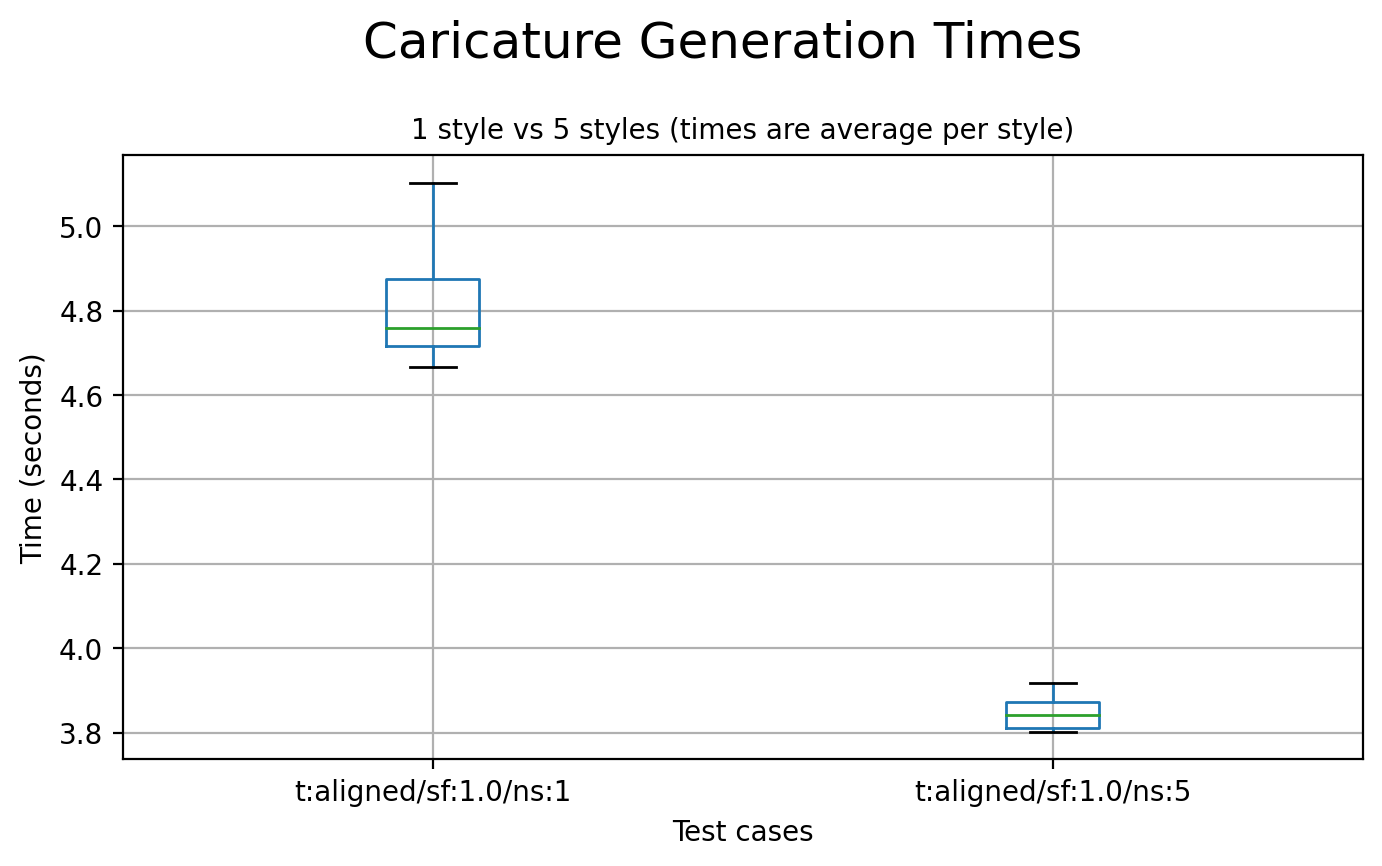

In [150]:
plt.figure(figsize=(8, 4), dpi=200)
plt.suptitle("Caricature Generation Times", y=1.05, fontsize=18)
plt.title("1 style vs 5 styles (times are average per style)", fontsize=10)
plt.ylabel("Time (seconds)")
plt.xlabel("Test cases")
res2.boxplot(fontsize=10)

display(res2.mean())
display(res2.std())

In [127]:
params2 = {
    "images": [
        "image_0.jpg",
    ],
    "scales": [0.5, 1.0, 3.0],
    "num_styles": [1],
    "image_types": ["aligned"]
}

res3 = test_suite(test_params=params2, tests=20)

Starting test suite (20) [03/05/2021 22:41:13]
Suite: t:aligned/sf:0.5/ns:1 [03/05/2021 22:41:13]
Suite: t:aligned/sf:1.0/ns:1 [03/05/2021 22:43:01]
Suite: t:aligned/sf:3.0/ns:1 [03/05/2021 22:44:49]
Test suite took 323.804979801178 [03/05/2021 22:46:37]


t:aligned/sf:0.5/ns:1    4.809251
t:aligned/sf:1.0/ns:1    4.805216
t:aligned/sf:3.0/ns:1    4.828623
dtype: float64

t:aligned/sf:0.5/ns:1    0.142866
t:aligned/sf:1.0/ns:1    0.125034
t:aligned/sf:3.0/ns:1    0.159497
dtype: float64

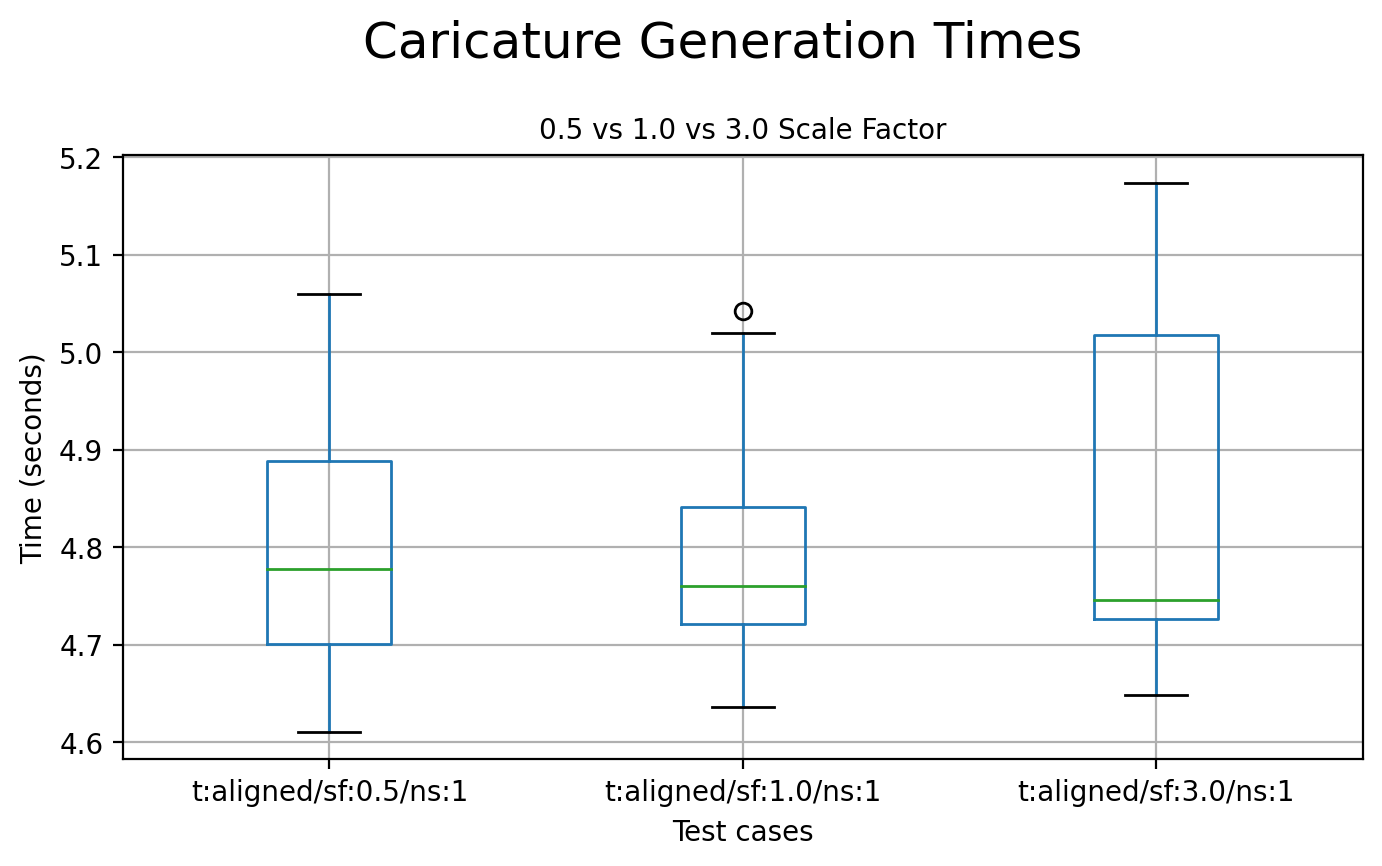

In [148]:
plt.figure(figsize=(8, 4), dpi=200)
plt.suptitle("Caricature Generation Times", y=1.05, fontsize=18)
plt.title("0.5 vs 1.0 vs 3.0 Scale Factor", fontsize=10)
plt.ylabel("Time (seconds)")
plt.xlabel("Test cases")
res3.boxplot(fontsize=10)

display(res3.mean())
display(res3.std())

In [136]:
params3 = {
    "images": [
        "image_0.jpg",
    ],
    "scales": [1.0],
    "num_styles": [1],
    "image_types": ["original", "aligned"]
}

res4 = test_suite(test_params=params3, tests=10)

Starting test suite (10) [03/05/2021 23:00:04]
Suite: t:original/sf:1.0/ns:1 [03/05/2021 23:00:04]
Suite: t:aligned/sf:1.0/ns:1 [03/05/2021 23:03:41]
Test suite took 270.7960159778595 [03/05/2021 23:04:35]


t:original/sf:1.0/ns:1    20.459340
t:aligned/sf:1.0/ns:1      4.822024
dtype: float64

t:original/sf:1.0/ns:1    0.196048
t:aligned/sf:1.0/ns:1     0.158230
dtype: float64

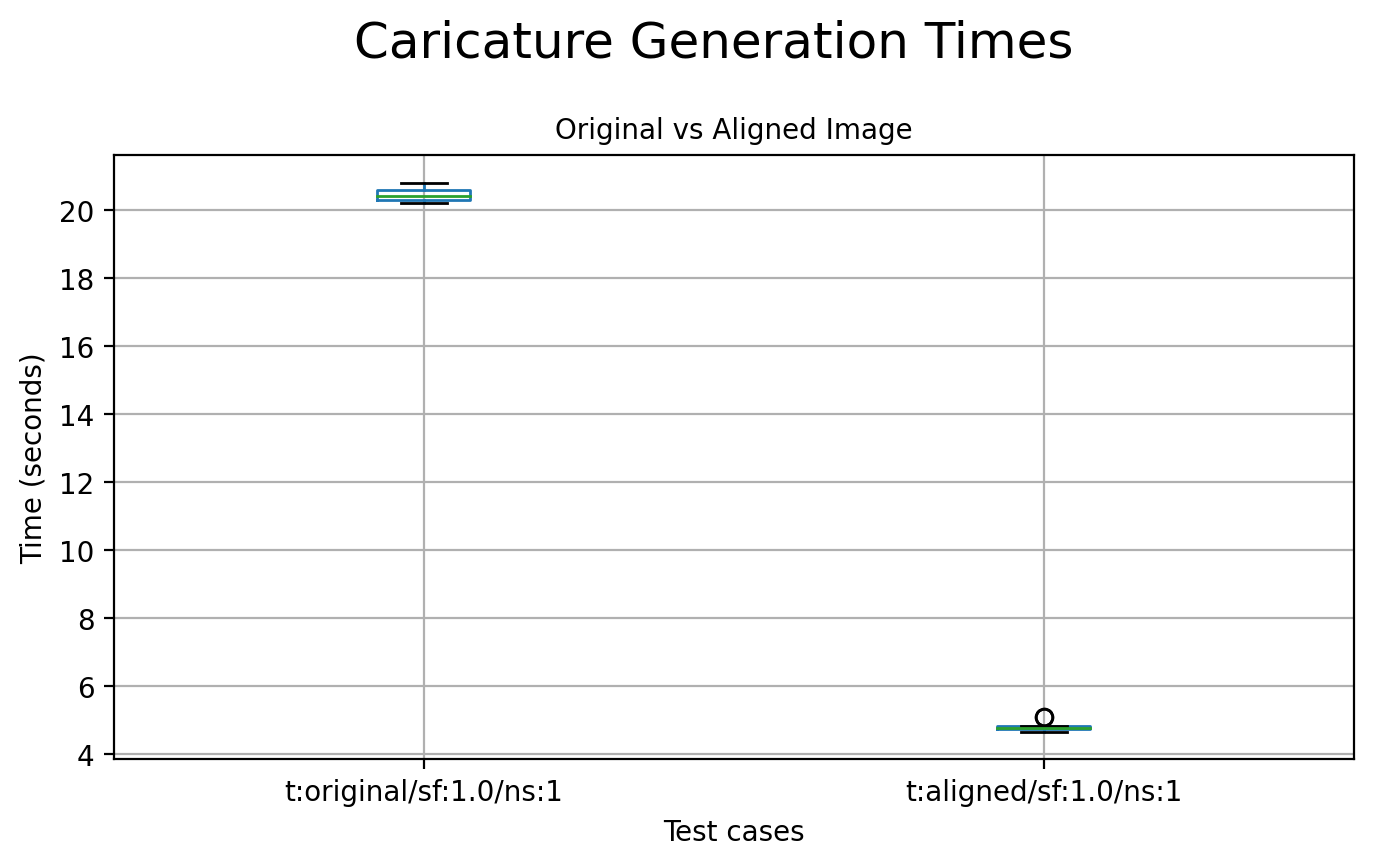

In [152]:
plt.figure(figsize=(8, 4), dpi=200)
plt.suptitle("Caricature Generation Times", y=1.05, fontsize=18)
plt.title("Original vs Aligned Image", fontsize=10)
plt.ylabel("Time (seconds)")
plt.xlabel("Test cases")
res4.boxplot(fontsize=10)

display(res4.mean())
display(res4.std())

In [176]:
params4 = {
    "images": [
        "image_0.jpg",
    ],
    "scales": [1.0],
    "num_styles": [1],
    "image_types": ["original", "aligned"]
}

res5 = test_suite(test_params=params4, tests=20)

Starting test suite (20) [04/05/2021 00:26:34]
Suite: p:image_0.jpg/t:original/sf:1.0/ns:1 [04/05/2021 00:26:34]
Suite: p:image_0.jpg/t:aligned/sf:1.0/ns:1 [04/05/2021 00:33:46]
Test suite took 541.3959224224091 [04/05/2021 00:35:35]


p:image_0.jpg/t:original/sf:1.0/ns:1    20.40578
p:image_0.jpg/t:aligned/sf:1.0/ns:1      4.87869
dtype: float64

p:image_0.jpg/t:original/sf:1.0/ns:1    0.200788
p:image_0.jpg/t:aligned/sf:1.0/ns:1     0.264222
dtype: float64

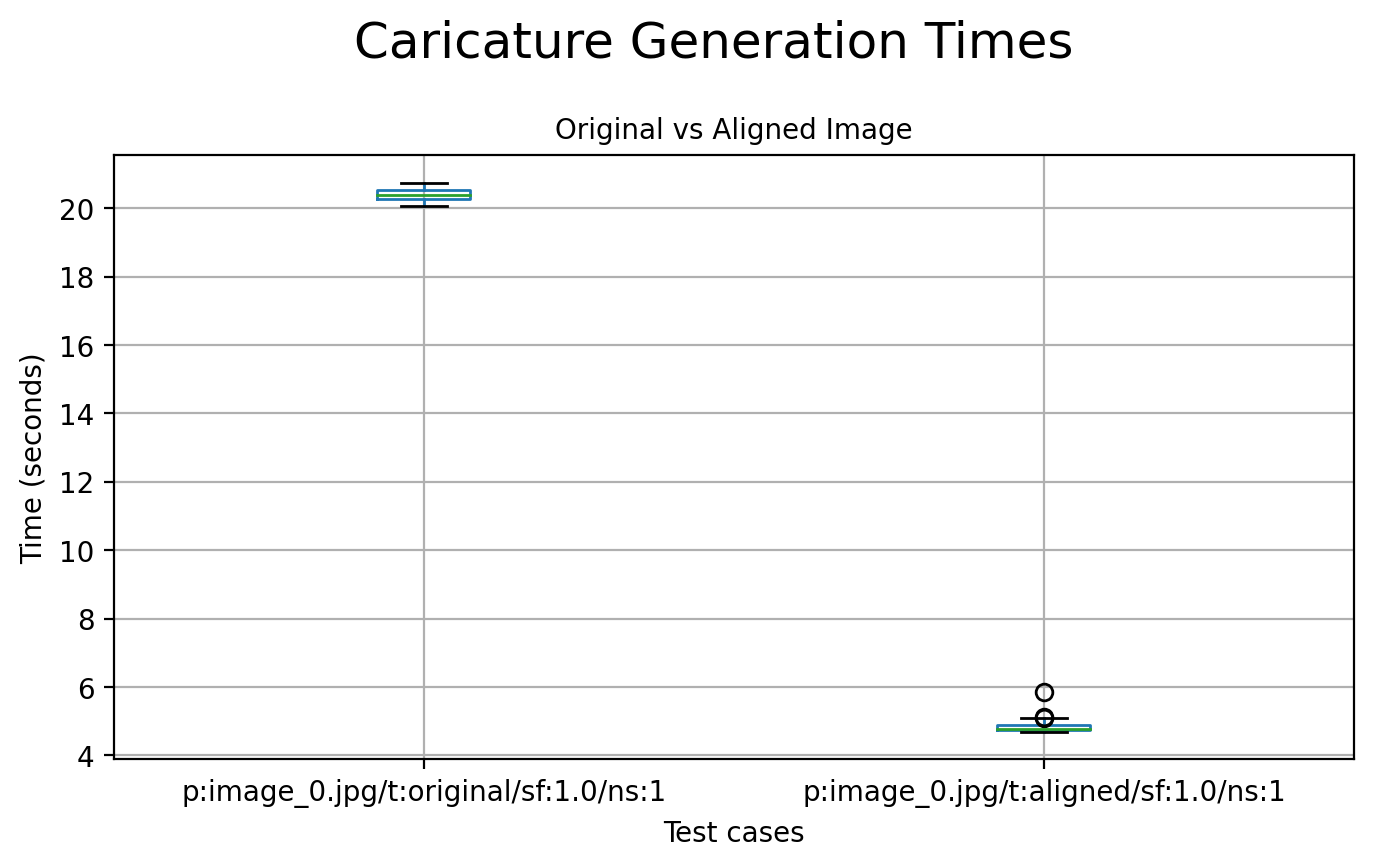

In [177]:
plt.figure(figsize=(8, 4), dpi=200)
plt.suptitle("Caricature Generation Times", y=1.05, fontsize=18)
plt.title("Original vs Aligned Image", fontsize=10)
plt.ylabel("Time (seconds)")
plt.xlabel("Test cases")
res5.boxplot(fontsize=10)

display(res5.mean())
display(res5.std())

In [147]:
params5 = {
    "images": [
        "image_0.jpg",
    ],
    "scales": [0.5, 1.0, 3.0, 6.5, 9.0],
    "num_styles": [1],
    "image_types": ["aligned"]
}

res6 = test_suite(test_params=params5, tests=20)

Starting test suite (20) [03/05/2021 23:32:59]
Suite: t:aligned/sf:0.5/ns:1 [03/05/2021 23:32:59]
Suite: t:aligned/sf:1.0/ns:1 [03/05/2021 23:34:47]
Suite: t:aligned/sf:3.0/ns:1 [03/05/2021 23:36:35]
Suite: t:aligned/sf:6.5/ns:1 [03/05/2021 23:38:23]
Suite: t:aligned/sf:9.0/ns:1 [03/05/2021 23:40:11]
Test suite took 540.3398423194885 [03/05/2021 23:41:59]


t:aligned/sf:0.5/ns:1    4.846597
t:aligned/sf:1.0/ns:1    4.824741
t:aligned/sf:3.0/ns:1    4.809210
t:aligned/sf:6.5/ns:1    4.825598
t:aligned/sf:9.0/ns:1    4.828722
dtype: float64

t:aligned/sf:0.5/ns:1    0.146805
t:aligned/sf:1.0/ns:1    0.158090
t:aligned/sf:3.0/ns:1    0.134964
t:aligned/sf:6.5/ns:1    0.156417
t:aligned/sf:9.0/ns:1    0.135456
dtype: float64

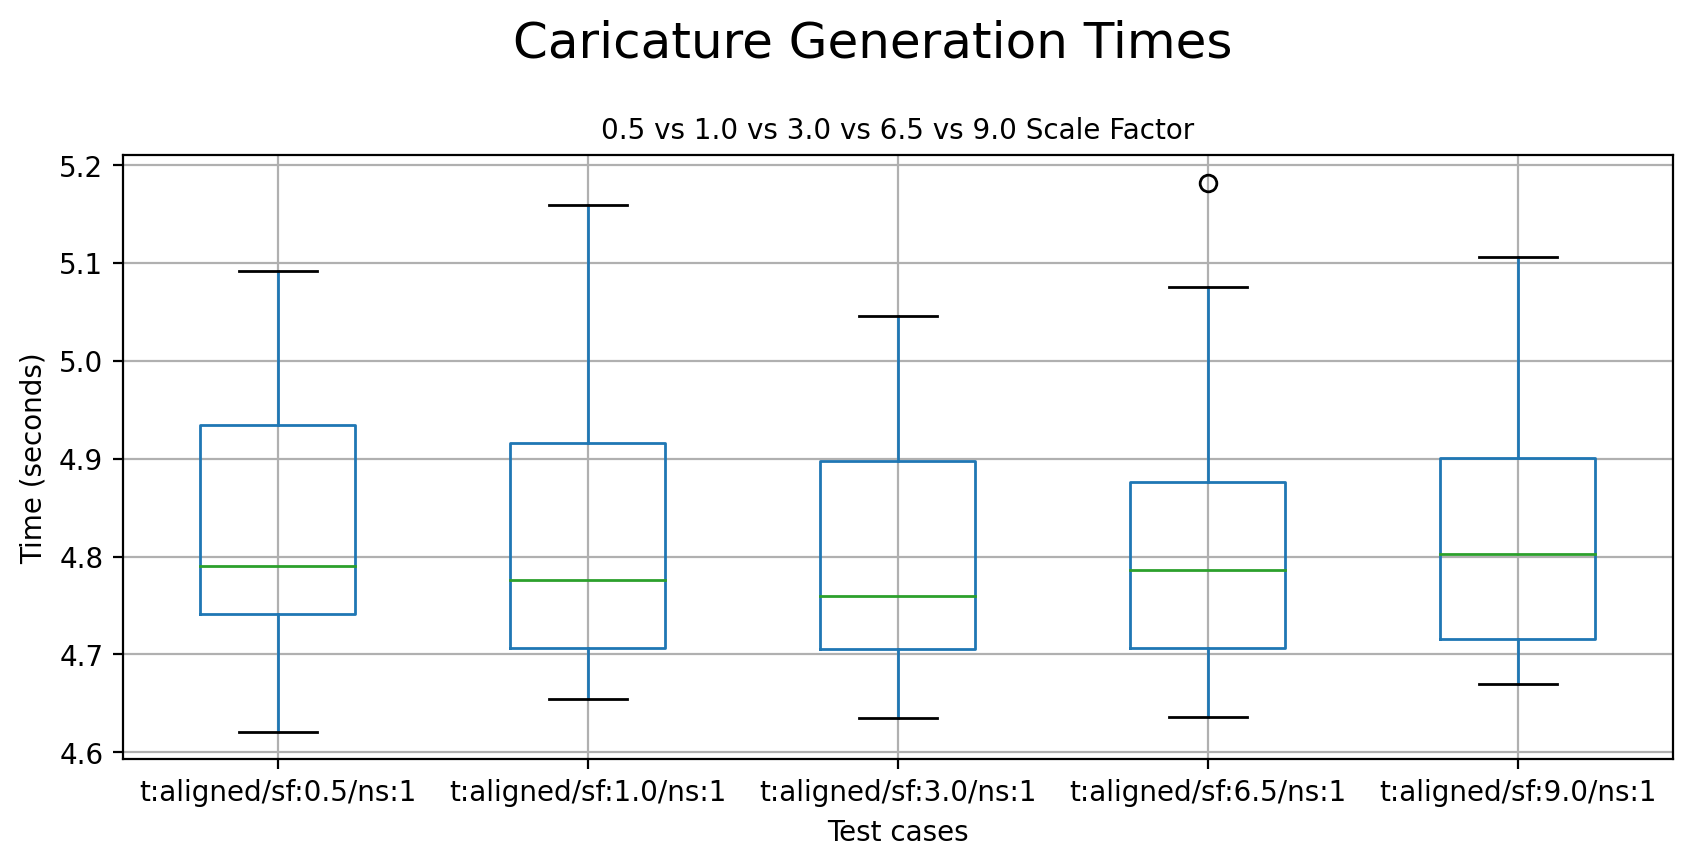

In [155]:
plt.figure(figsize=(10, 4), dpi=200)
plt.suptitle("Caricature Generation Times", y=1.05, fontsize=18)
plt.title("0.5 vs 1.0 vs 3.0 vs 6.5 vs 9.0 Scale Factor", fontsize=10)
plt.ylabel("Time (seconds)")
plt.xlabel("Test cases")
res6.boxplot(fontsize=10)

display(res6.mean())
display(res6.std())

In [157]:
params6 = {
    "images": [
        "image_0.jpg",
    ],
    "scales": [1.0],
    "num_styles": [1, 2, 5],
    "image_types": ["aligned"]
}

res7 = test_suite(test_params=params6, tests=20)

Starting test suite (20) [03/05/2021 23:53:26]
Suite: t:aligned/sf:1.0/ns:1 [03/05/2021 23:53:26]
Suite: t:aligned/sf:1.0/ns:2 [03/05/2021 23:55:14]
Suite: t:aligned/sf:1.0/ns:5 [03/05/2021 23:58:17]
Test suite took 687.231374502182 [04/05/2021 00:04:53]


t:aligned/sf:1.0/ns:1    4.809146
t:aligned/sf:1.0/ns:2    4.302402
t:aligned/sf:1.0/ns:5    3.843376
dtype: float64

t:aligned/sf:1.0/ns:1    0.134224
t:aligned/sf:1.0/ns:2    0.081728
t:aligned/sf:1.0/ns:5    0.034718
dtype: float64

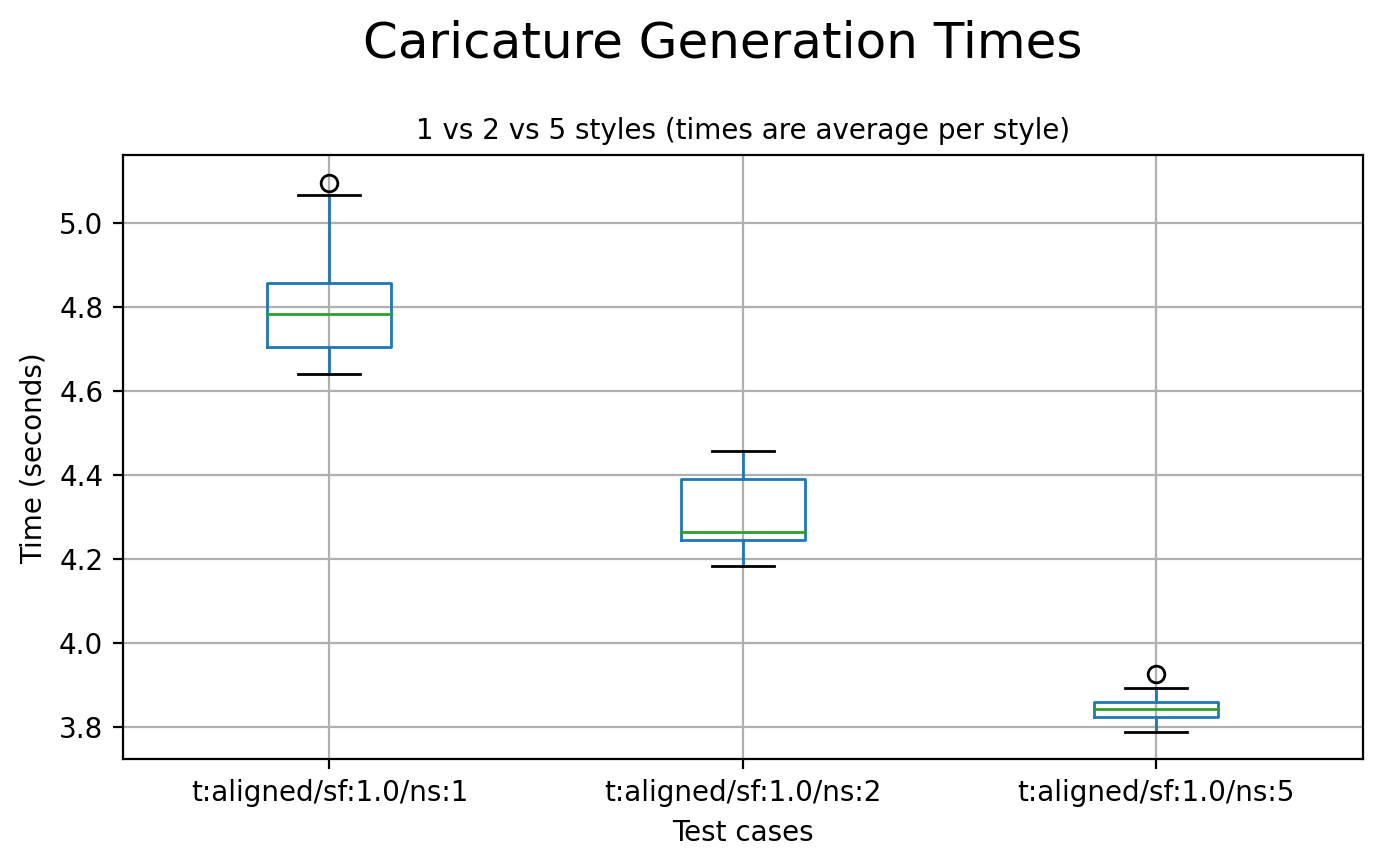

In [169]:
plt.figure(figsize=(8, 4), dpi=200)
plt.suptitle("Caricature Generation Times", y=1.05, fontsize=18)
plt.title("1 vs 2 vs 5 styles (times are average per style)", fontsize=10)
plt.ylabel("Time (seconds)")
plt.xlabel("Test cases")
res7.boxplot(fontsize=10)

display(res7.mean())
display(res7.std())

In [167]:
params7 = {
    "images": [
        "image_4.png",
        "image_0.jpg",
    ],
    "scales": [1.0],
    "num_styles": [1],
    "image_types": ["aligned"]
}

res8 = test_suite(test_params=params7, tests=20)

Starting test suite (20) [04/05/2021 00:13:16]
Suite: p:image_4.png/t:aligned/sf:1.0/ns:1 [04/05/2021 00:13:16]
Suite: p:image_0.jpg/t:aligned/sf:1.0/ns:1 [04/05/2021 00:15:06]
Test suite took 218.77764511108398 [04/05/2021 00:16:54]


p:image_4.png/t:aligned/sf:1.0/ns:1    4.872957
p:image_0.jpg/t:aligned/sf:1.0/ns:1    4.846054
dtype: float64

p:image_4.png/t:aligned/sf:1.0/ns:1    0.153556
p:image_0.jpg/t:aligned/sf:1.0/ns:1    0.141704
dtype: float64

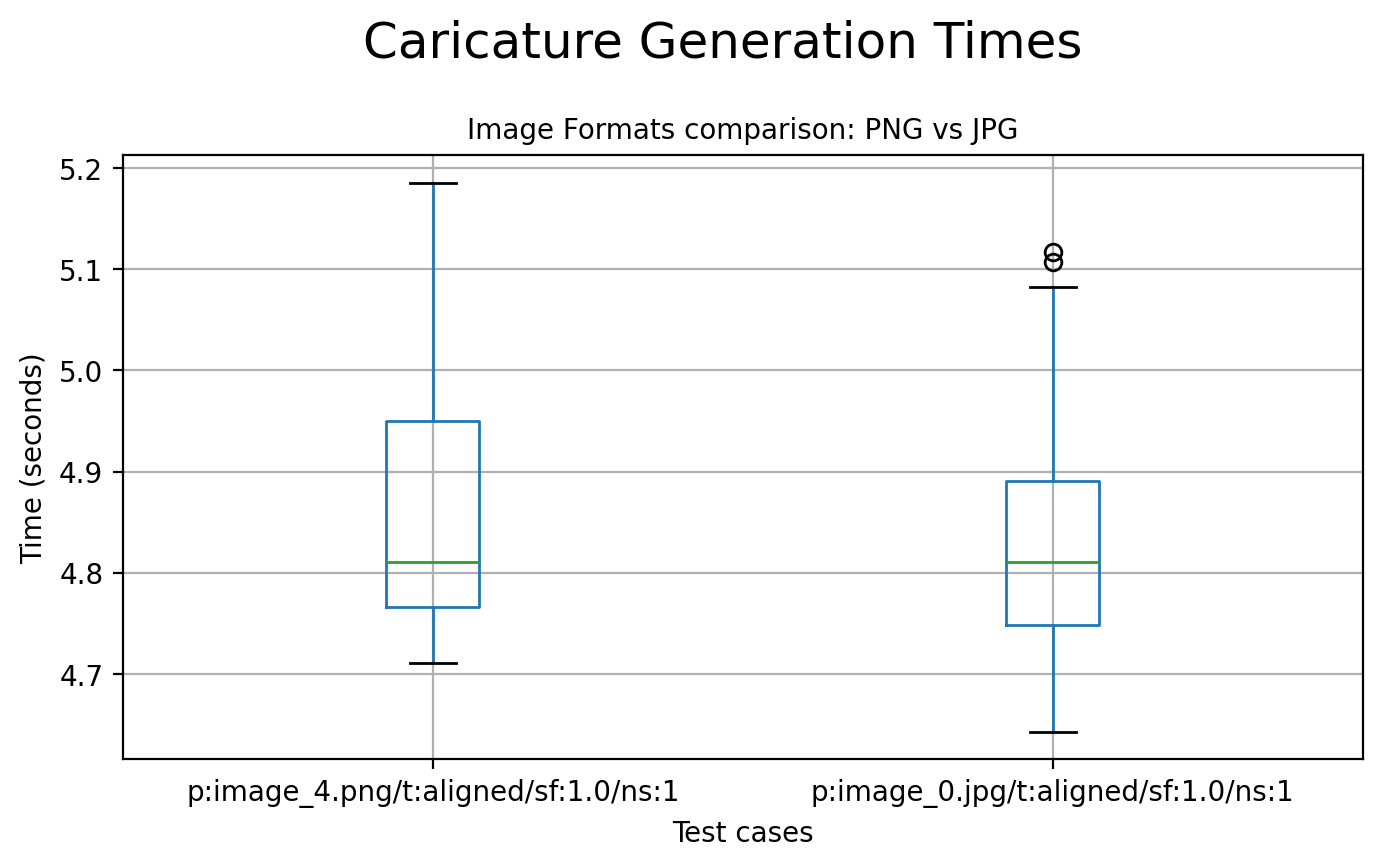

In [172]:
plt.figure(figsize=(8, 4), dpi=200)
plt.suptitle("Caricature Generation Times", y=1.05, fontsize=18)
plt.title("Image Formats comparison: PNG vs JPG", fontsize=10)
plt.ylabel("Time (seconds)")
plt.xlabel("Test cases")
res8.boxplot(fontsize=10)

display(res8.mean())
display(res8.std())

In [178]:
# res4.to_csv("Original vs Aligned Image.csv")
# res3.to_csv("0.5 vs 1.0 vs 3.0 Scale Factor.csv")
# res2.to_csv("1 style vs 5 styles (times are average per style).csv")
# res5.to_csv("Original vs Aligned Image(20 reps).csv")
# res6.to_csv("0.5 vs 1.0 vs 3.0 vs 6.5 vs 9.0 Scale Factor.csv")
# res7.to_csv("1 vs 2 vs 5 styles (times are average per style).csv")
# res8.to_csv("Image Formats comparison - PNG vs JPG.csv")
